In [1]:
# !pip install scikit-learn

In [18]:
# -------------------------
# 1. IMPORT LIBRARIES
# -------------------------
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


In [3]:

# -------------------------
# 2. REPRODUCIBILITY
# -------------------------
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [4]:
# -------------------------
# 3. DEFINE PATHS (already sampled dataset)
# -------------------------
small_train = "SmallDataset/Train"
small_val   = "SmallDataset/Val"
small_test  = "SmallDataset/Test"

In [5]:
# -------------------------
# 4. DATA LOADING (GRAYSCALE)
# -------------------------
img_size = (32,32)
batch_size = 32
epochs = 20

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    small_train,
    target_size=img_size,
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

val_gen = train_datagen.flow_from_directory(
    small_val,
    target_size=img_size,
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

test_gen = test_datagen.flow_from_directory(
    small_test,
    target_size=img_size,
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

num_classes = len(train_gen.class_indices)

Found 2880 images belonging to 24 classes.
Found 480 images belonging to 24 classes.
Found 483 images belonging to 24 classes.


In [6]:
# -------------------------
# 5. CNN MODEL (UPGRADED)
# -------------------------

inputs = layers.Input(shape=(32,32,1))

# Block 1
x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2,2))(x)

# Block 2
x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2,2))(x)

# Block 3
x = layers.Conv2D(256, (3,3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(256, (3,3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2,2))(x)

# Dense layers
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs, outputs)

In [7]:
# -------------------------
# 6. COMPILE MODEL
# -------------------------
model.compile(
    optimizer=optimizers.Adam(0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [8]:
# -------------------------
# 7. TRAIN MODEL
# -------------------------
print("\n========== TRAINING STARTED ==========\n")
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs,
    verbose=1
)


========== TRAINING STARTED ==========



D:\New folder\envs\deep\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 88s 898ms/step - accuracy: 0.0988 - loss: 3.5520 - val_accuracy: 0.0417 - val_loss: 3.2761
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 459ms/step - accuracy: 0.3581 - loss: 2.1294 - val_accuracy: 0.0458 - val_loss: 3.4697
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 42s 462ms/step - accuracy: 0.5733 - loss: 1.4413 - val_accuracy: 0.0625 - val_loss: 3.6534
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 37s 412ms/step - accuracy: 0.7152 - loss: 0.9404 - val_accuracy: 0.0812 - val_loss: 3.5927
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 30s 332ms/step - accuracy: 0.8140 - loss: 0.6045 - val_accuracy: 0.1729 - val_loss: 2.7081
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 30s 329ms/step - accuracy: 0.8541 - loss: 0.4611 - val_accuracy: 0.6854 - val_loss: 1.1122
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 30s 331ms/step - accuracy: 0.8997 - loss: 0.3255 - val_accuracy: 0.9375 - val_loss: 0.2859
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 30s 329ms/step - accuracy: 0.9317 - loss: 0.2397 - val_accu

In [9]:
# -------------------------
# 8. TEST MODEL
# -------------------------
print("\n========== TESTING MODEL ==========\n")
test_loss, test_acc = model.evaluate(test_gen, verbose=1)
print(f"\nFinal Test Accuracy: {test_acc:.4f}")
print(f"Final Test Loss:     {test_loss:.4f}")


========== TESTING MODEL ==========

16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 531ms/step - accuracy: 0.9576 - loss: 0.1287

Final Test Accuracy: 0.9234
Final Test Loss:     0.2357


In [36]:
# -------------------------
# 9. CLASSIFICATION REPORT
# -------------------------
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)
y_true = test_gen.classes
labels = list(test_gen.class_indices.keys())

print("\n========== CLASSIFICATION REPORT ==========\n")
print(classification_report(y_true, y_pred, target_names=labels))

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step

========== CLASSIFICATION REPORT ==========

              precision    recall  f1-score   support

           A       0.96      1.00      0.98        22
           B       1.00      1.00      1.00        20
           C       1.00      1.00      1.00        20
           D       0.94      0.85      0.89        20
           E       0.95      1.00      0.98        20
           F       0.95      1.00      0.98        20
           G       1.00      1.00      1.00        20
           H       0.91      1.00      0.95        20
           I       1.00      1.00      1.00        20
           K       0.94      0.81      0.87        21
           L       0.91      1.00      0.95        20
           M       0.86      0.90      0.88        20
           N       0.89      0.85      0.87        20
           O       1.00      1.00      1.00        20
           P       1.00      1.00      1.00        20
           Q       1.00      1.00      1.00     

In [37]:
# -------------------------
# 10. SAVE MODEL
# -------------------------
model.save("SignLanguageCNN-small.h5")
print("\nModel saved as SignLanguageCNN-small.h5")


Model saved as SignLanguageCNN-small.h5


In [38]:

# -------------------------------------------------------------------
# CLASS AND CUSTOM NAME DEFINITIONS
# -------------------------------------------------------------------
# These are the 25 ASL letters (folder names) the model was trained on
CLASS_NAMES = [
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
    'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y'
]

CUSTOM_SIGN_NAMES = {
    'A': 'A',       
    'B': 'B',        
    'C': 'C',
    'D': 'D',
    'E': 'E',
    'F': 'F',
    'G': 'G',
    'H': 'H',
    'I': 'I',
    'J': 'J',
    'K': 'K',
    'L': 'L',
    'M': 'M',
    'N': 'N',
    'O': 'O',
    'P': 'P',
    'Q': 'Q',
    'R': 'R',
    'S': 'S',
    'T': 'T',
    'U': 'U',
    'V': 'V',
    'W': 'W',
    'X': 'X',
    'Y': 'Y'
}

print("Setup complete. Custom names are ready for use.")

Setup complete. Custom names are ready for use.


In [39]:
# CODE BLOCK 2: Model Loading

model_path = "SignLanguageCNN-small.h5"
try:
    model = load_model(model_path)
    print(f"✅ Model successfully loaded: {model_path}")
    print(f"Model input shape: {model.input_shape}")
except Exception as e:
    print(f"❌ Error loading model. Check if '{model_path}' exists in the current directory.")
    print(f"Error: {e}")

✅ Model successfully loaded: SignLanguageCNN-small.h5
Model input shape: (None, 32, 32, 1)


In [40]:
# CODE BLOCK 3: Define Preprocessing and Prediction Functions

def preprocess_image(img_path, target_size=(32, 32)):
    """Loads, resizes (32x32), and normalizes a grayscale image."""
    
    # Load the image in grayscale (1-channel)
    img = image.load_img(img_path, target_size=target_size, color_mode="grayscale")
    img_array = image.img_to_array(img)
    
    # Expand dimension for batch size: (32, 32, 1) -> (1, 32, 32, 1)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Normalize (0 to 1)
    img_array = img_array / 255.0
    
    return img_array, img

def predict_asl_sign(img_path):
    """Preprocesses image, predicts class, and returns custom sign name."""
    
    # 1. Check if image exists
    if not os.path.exists(img_path):
        print(f"\n❌ Error: Test image file not found at path: {img_path}")
        return

    # 2. Prepare image
    processed_img_array, original_img = preprocess_image(img_path)
    
    # 3. Predict
    predictions = model.predict(processed_img_array)
    
    # 4. Get results
    predicted_index = np.argmax(predictions[0])
    predicted_asl_letter = CLASS_NAMES[predicted_index]
    
    # 5. Map to Custom Name (Uses the dictionary from Block 1)
    predicted_custom_sign = CUSTOM_SIGN_NAMES.get(predicted_asl_letter, "UNKNOWN SIGN")
    
    # 6. Get confidence
    confidence = predictions[0][predicted_index] * 100
    
    # 7. Display Result
    print("\n========== PREDICTION RESULT ==========")
    print(f"🖼️  Image Path: {img_path}")
    print(f"⭐ Model Predicted Letter (Technical): {predicted_asl_letter}")
    print(f"👉 CUSTOM SIGN (Final Output): {predicted_custom_sign}")
    print(f"🎯 Confidence: {confidence:.2f}%")
    
    plt.imshow(original_img, cmap='gray')
    plt.title(f"Sign: {predicted_custom_sign} ({confidence:.1f}%)", fontsize=14)
    plt.axis('off')
    plt.show()

print("Prediction functions defined.")

Prediction functions defined.


Testing image at path: SmallDataset/Test/K/3085_K.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

========== PREDICTION RESULT ==========
🖼️  Image Path: SmallDataset/Test/K/3085_K.jpg
⭐ Model Predicted Letter (Technical): J
👉 CUSTOM SIGN (Final Output): J
🎯 Confidence: 60.58%


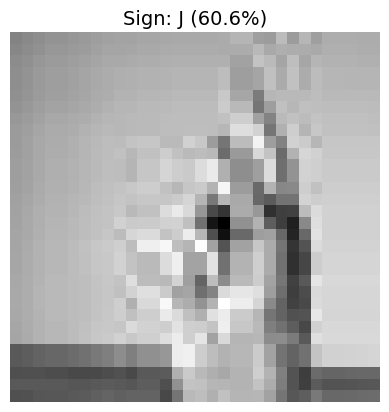

In [41]:


# CODE BLOCK 4: Execute Prediction on Test Image 1


test_image_path_1 = "SmallDataset/Test/K/3085_K.jpg" 

print(f"Testing image at path: {test_image_path_1}")
predict_asl_sign(test_image_path_1)


Testing another image at path: SmallDataset/Test/A/5018_A.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step

========== PREDICTION RESULT ==========
🖼️  Image Path: SmallDataset/Test/A/5018_A.jpg
⭐ Model Predicted Letter (Technical): A
👉 CUSTOM SIGN (Final Output): A
🎯 Confidence: 100.00%


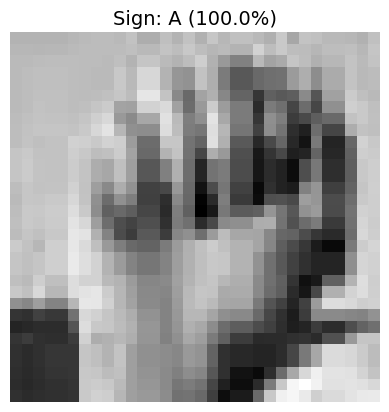

In [42]:
# CODE BLOCK 5: Execute Prediction on Test Image 2

test_image_path_2 = "SmallDataset/Test/A/5018_A.jpg" 

print(f"\nTesting another image at path: {test_image_path_2}")
predict_asl_sign(test_image_path_2)